## Data Science Academy
### Homework Python Programming for data analytics III

#### Created by : Dhany Wika Setyawan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Meyer, Mr. Edgar Joseph",male,347082,G6,S
freq,1,577,7,4,644


### How many survive in the dataset?

In [9]:
df.groupby('Survived').count().Name

Survived
0    549
1    342
Name: Name, dtype: int64

In [10]:
df.groupby(['Survived','Sex']).count().Name

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

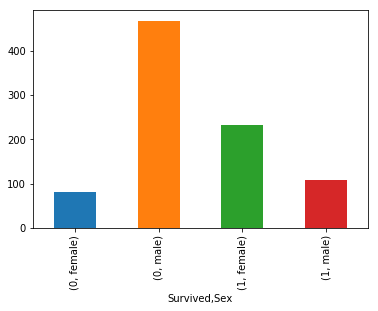

In [11]:
df.groupby(['Survived','Sex']).count().Name.plot(kind='bar')

#### There are 342 survived and 549 non survived
#### Out of those survived (233 are female, 109 are male ) whereas non survived ( 81 are female, 468 are male)

## Transforming the data

In [5]:
# transform Pclass and Embarked
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
df['socioeconomicstatus']=df.Pclass.map({1:'upper',2:'middle',3:'lower'})

# (C = Cherbourg; Q = Queenstown; S = Southampton)
df['embarkedport']=df.Embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

df.drop(['Pclass','Embarked'],axis=1,inplace=True)

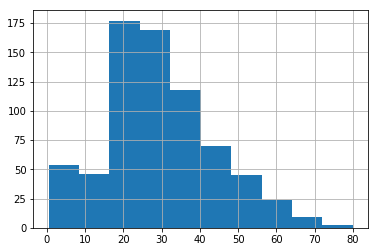

In [6]:
df.Age.hist()

In [7]:
# Let us try to separate this into ages
agesplit = [0,10,18,25,40,90]
agestatus = ['Adolescent','Teenager','Young Adult','Adult','Elder']

df['agegroup']=pd.cut(df.Age,agesplit,labels=agestatus)

# Create a feature where we count both numbers of siblings and parents
df['familymembers']=df.SibSp+df.Parch

# Let us try to find whether the passengers are alone or not
hasfamily = (df.familymembers>0)*1
df['hasfamily'] = hasfamily

# Dropping the used columns
df.drop(['SibSp','Parch','Age'],axis=1,inplace=True)

df.head(10)

,PassengerId,Survived,Name,Sex,Ticket,Fare,Cabin,socioeconomicstatus,embarkedport,agegroup,familymembers,hasfamily
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,lower,Southampton,Young Adult,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,upper,Cherbourg,Adult,1,1
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,lower,Southampton,Adult,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,upper,Southampton,Adult,1,1
4,5,0,"Allen, Mr. William Henry",male,373450,8.0500,NaN,lower,Southampton,Adult,0,0
5,6,0,"Moran, Mr. James",male,330877,8.4583,NaN,lower,Queenstown,NaN,0,0
6,7,0,"McCarthy, Mr. Timothy J",male,17463,51.8625,E46,upper,Southampton,Elder,0,0
7,8,0,"Palsson, Master. Gosta Leonard",male,349909,21.0750,NaN,lower,Southampton,Adolescent,4,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,11.1333,NaN,lower,Southampton,Adult,2,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,30.0708,NaN,middle,Cherbourg,Teenager,1,1


### The proportion of survivor with spread of age group

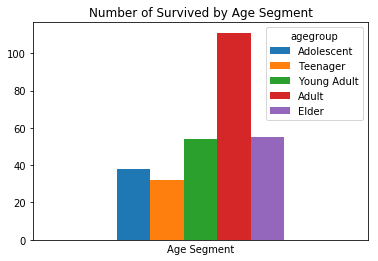

In [27]:
# The proportion of survivor with family
df[df['Survived'] == 1].groupby(['Survived','agegroup']).size().unstack().plot(kind='bar')
plt.title('Number of Survived by Age Segment')
plt.xlabel('Age Segment')
plt.xticks([])
plt.show()

### The proportion of survivor with family

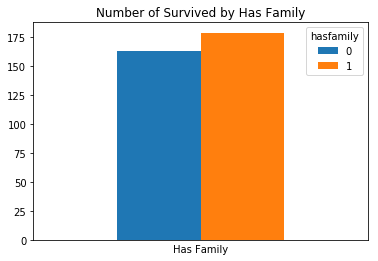

In [29]:
# The proportion of survivor with family
df[df['Survived'] == 1].groupby(['Survived','hasfamily']).size().unstack().plot(kind='bar')
plt.title('Number of Survived by Has Family')
plt.xlabel('Has Family')
plt.xticks([])
plt.show()

### The proportion of survivor with socioeconomic

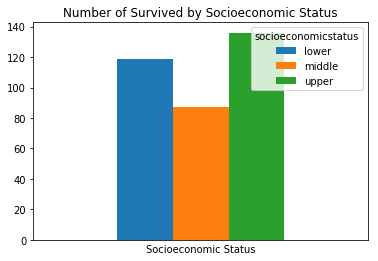

In [24]:
# The proportion of survivor with family
df[df['Survived'] == 1].groupby(['Survived','socioeconomicstatus']).size().unstack().plot(kind='bar')
plt.title('Number of Survived by Socioeconomic Status')
plt.xlabel('Socioeconomic Status')
plt.xticks([])
plt.show()

## Conclusion:
### 1. Gender plays a very important roles, female has the most likelihood of surviving.
### 2. Adult has higher chances of surviving.
### 3. The higher Socioeconomic status, the more likelihood of surviving.